<a href="https://colab.research.google.com/github/ShreyPandit/StockPrice-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [79]:
import pandas as pd 
import numpy as np
from scipy.stats import norm
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

start = datetime.datetime(2000,1, 1)
end = datetime.datetime(2020, 12, 23)

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
import matplotlib.pyplot as plt
import tensorflow as tf


Defining the parameters

In [2]:
# Lookback day is the number of days the model will refer to for predicting the value
look_back = 90
# forward day is the number of days for prediction
foward_days = 5

In [11]:
# Importing the datavalue
df= web.DataReader('^NSEI',"yahoo",start,end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-09-17,4549.049805,4482.850098,4518.450195,4494.649902,0.0,4494.649902
2007-09-18,4551.799805,4481.549805,4494.100098,4546.200195,0.0,4546.200195
2007-09-19,4739.000000,4550.250000,4550.250000,4732.350098,0.0,4732.350098
2007-09-20,4760.850098,4721.149902,4734.850098,4747.549805,0.0,4747.549805
2007-09-21,4855.700195,4733.700195,4752.950195,4837.549805,0.0,4837.549805
...,...,...,...,...,...,...
2020-12-18,13772.849609,13658.599609,13764.400391,13760.549805,519400.0,13760.549805
2020-12-21,13777.500000,13131.450195,13741.900391,13328.400391,687300.0,13328.400391
2020-12-22,13492.049805,13192.900391,13373.650391,13466.299805,696200.0,13466.299805


In [12]:
# Droping the Open,Volume and Adj close values and keeping just the high, low and close values
df = df.drop('Open',axis=1)
df = df.drop('Volume',axis=1)
df = df.drop('Adj Close',axis=1)
df

,High,Low,Close
Date,,,
2007-09-17,4549.049805,4482.850098,4494.649902
2007-09-18,4551.799805,4481.549805,4546.200195
2007-09-19,4739.000000,4550.250000,4732.350098
2007-09-20,4760.850098,4721.149902,4747.549805
2007-09-21,4855.700195,4733.700195,4837.549805
...,...,...,...
2020-12-18,13772.849609,13658.599609,13760.549805
2020-12-21,13777.500000,13131.450195,13328.400391
2020-12-22,13492.049805,13192.900391,13466.299805


In [15]:
# changing the type of file and few item type modifications
df.to_csv("Data.csv")
df = pd.read_csv('Data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.head()

,High,Low,Close
Date,,,
2007-09-17,4549.049805,4482.850098,4494.649902
2007-09-18,4551.799805,4481.549805,4546.200195
2007-09-19,4739.000000,4550.250000,4732.350098
2007-09-20,4760.850098,4721.149902,4747.549805
2007-09-21,4855.700195,4733.700195,4837.549805


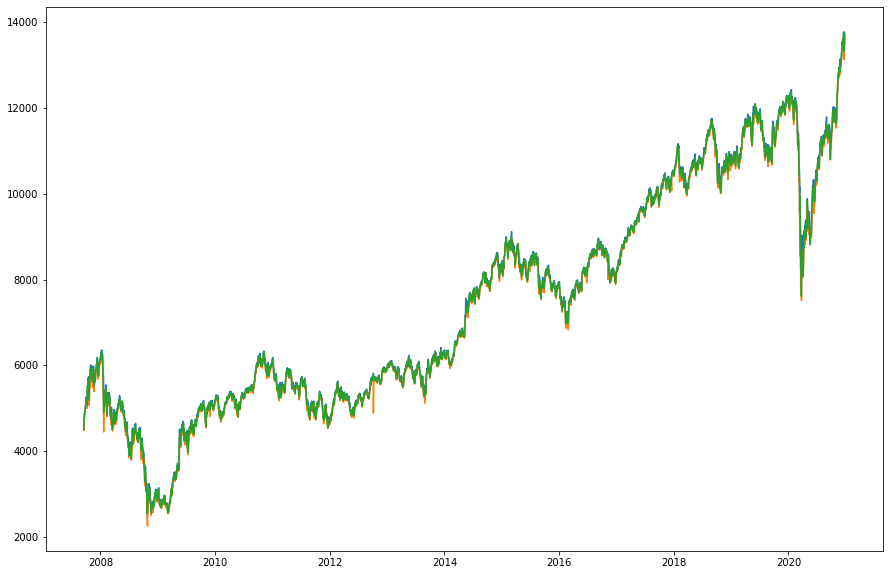

In [16]:
# visualizing the Chart
plt.figure(figsize = (15,10))
plt.plot(df)
plt.show()

In [20]:
# Reshaping the viewing the value
array = df.values.reshape(df.shape[0],3)
array[:5]

array([[4549.04980469, 4482.85009766, 4494.64990234],
       [4551.79980469, 4481.54980469, 4546.20019531],
       [4739.        , 4550.25      , 4732.35009766],
       [4760.85009766, 4721.14990234, 4747.54980469],
       [4855.70019531, 4733.70019531, 4837.54980469]])

In [21]:
# Scaling the price values.
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
array = scl.fit_transform(array)
array[:5]

array([[0.17545699, 0.19526654, 0.17536388],
       [0.1757027 , 0.19515269, 0.1799517 ],
       [0.19242865, 0.20116805, 0.19651846],
       [0.19438091, 0.21613196, 0.19787118],
       [0.20285557, 0.21723086, 0.2058809 ]])

In [22]:
# number of period is the number of segments in which the model would learn
num_periods = 20

division = len(array) - num_periods*foward_days
array_test = array[division-look_back:]
array_train = array[:division]

In [23]:
# Pre-processing the data, creating an array which is suitable for the input
def processData(data, look_back, foward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -foward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+foward_days)])
    return np.array(X),np.array(Y)


In [24]:
# Spliting the training and testing values.
X_test,y_test = processData(array_test,look_back,foward_days,foward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,foward_days)
y = np.array([list(a.ravel()) for a in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)


In [25]:
#Displaying the shapes of inputs
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)


(2440, 90, 3)
(610, 90, 3)
(20, 90, 3)
(2440, 15)
(610, 15)
(20, 15)


In [53]:
# Defining the model 
NUM_NEURONS_FirstLayer = 256
NUM_NEURONS_SecondLayer = 128
NUM_NEURONS_ThirdLayer = 64
NUM_NEURONS_FourthLayer = 32
EPOCHS = 150


model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,3), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(NUM_NEURONS_SecondLayer,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(NUM_NEURONS_ThirdLayer,return_sequences=True))
model.add(LSTM(NUM_NEURONS_FourthLayer))
model.add(Dense(64))
model.add(Dense(foward_days*3))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 90, 256)           266240    
_________________________________________________________________
dropout_10 (Dropout)         (None, 90, 256)           0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 90, 128)           197120    
_________________________________________________________________
dropout_11 (Dropout)         (None, 90, 128)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 90, 64)            49408     
_________________________________________________________________
lstm_28 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [54]:
# Creating a callback of model checkpoint to save all the values
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_loss',
    mode='max',
    save_best_only=True)

In [55]:
# Reducing the LR incase the loss stabalizes for some epochs
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [56]:
# fitting the model
history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=8, verbose=1,callbacks = [model_checkpoint_callback,reduce_lr])

Epoch 1/150
305/305 [==============================] - 10s 22ms/step - loss: 0.0209 - val_loss: 0.0025
Epoch 2/150
305/305 [==============================] - 6s 19ms/step - loss: 0.0012 - val_loss: 5.5612e-04
Epoch 3/150
305/305 [==============================] - 5s 17ms/step - loss: 9.8187e-04 - val_loss: 8.6570e-04
Epoch 4/150
305/305 [==============================] - 5s 17ms/step - loss: 8.2656e-04 - val_loss: 5.3949e-04
Epoch 5/150
305/305 [==============================] - 5s 17ms/step - loss: 7.8054e-04 - val_loss: 0.0015
Epoch 6/150
305/305 [==============================] - 6s 18ms/step - loss: 6.8328e-04 - val_loss: 6.1179e-04
Epoch 7/150
305/305 [==============================] - 6s 18ms/step - loss: 7.0355e-04 - val_loss: 4.8754e-04
Epoch 8/150
305/305 [==============================] - 6s 18ms/step - loss: 7.5700e-04 - val_loss: 5.6737e-04
Epoch 9/150
305/305 [==============================] - 5s 17ms/step - loss: 6.7607e-04 - val_loss: 7.2502e-04
Epoch 10/150
305/305 [===

In [57]:
#Saving the model
file_name = 'Nifty'
model.save(file_name)
print("Saved model `{}` to disk".format(file_name))


INFO:tensorflow:Assets written to: Nifty/assets


INFO:tensorflow:Assets written to: Nifty/assets


Saved model `Nifty` to disk


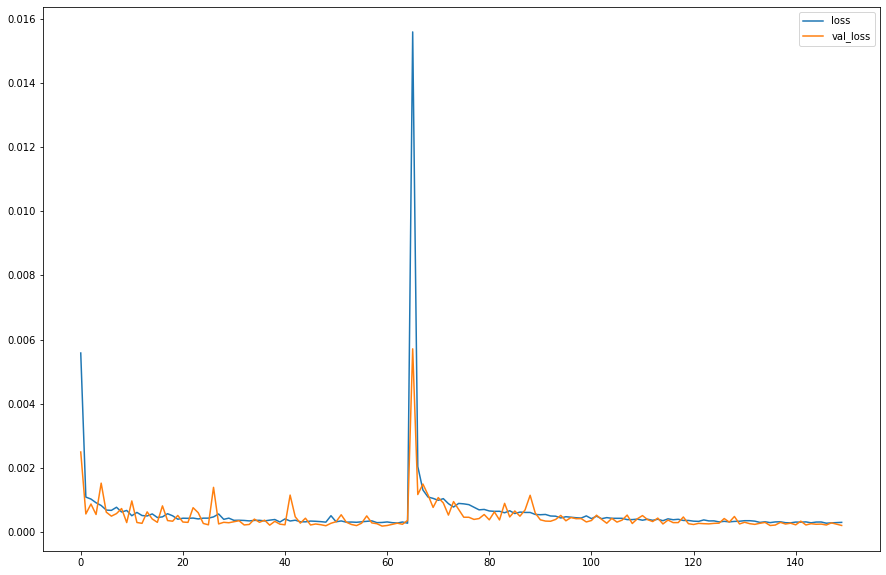

In [58]:
# Displaying the loss values.
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

# Creating samples for predicting the future value.

In [59]:
Xt = model.predict(X_test)

In [61]:
division = len(array) - num_periods*foward_days

leftover = division%foward_days+1

array_test = array[division-look_back:]
array_train = array[leftover:division]


In [62]:
Xtrain,ytrain = processData(array_train,look_back,foward_days,foward_days)
Xtest,ytest = processData(array_test,look_back,foward_days,foward_days)

In [63]:
Xtrain = model.predict(Xtrain)
Xtrain = Xtrain.ravel()

Xtest = model.predict(Xtest)
Xtest = Xtest.ravel()

In [64]:
y = np.concatenate((ytrain, ytest), axis=0)

In [66]:
array[-5:]

array([[0.9995845 , 0.99869097, 1.        ],
       [1.        , 0.95253401, 0.96154005],
       [0.97449561, 0.95791456, 0.97381267],
       [0.98587858, 0.97886754, 0.98580943],
       [0.99657354, 0.9959154 , 0.99748584]])

In [68]:
scl.inverse_transform(array[-5:].reshape(-1,3))

array([[13772.84960938, 13658.59960938, 13760.54980469],
       [13777.5       , 13131.45019531, 13328.40039062],
       [13492.04980469, 13192.90039062, 13466.29980469],
       [13619.45019531, 13432.20019531, 13601.09960937],
       [13739.15039062, 13626.90039063, 13732.29980469]])

In [69]:
y_test.shape

(20, 15)

In [70]:
Z = []
Z.append(array[-40:])

In [71]:
Z  = np.array(Z)

In [72]:
Z.shape

(1, 40, 3)

In [73]:
out = model.predict(Z)

In [74]:
out = out.ravel()

In [75]:
out

array([0.8650798 , 0.8673917 , 0.8626833 , 0.85894406, 0.8693032 ,
       0.8559924 , 0.86190724, 0.86935836, 0.8652847 , 0.86238766,
       0.8703971 , 0.8615149 , 0.85995543, 0.8638636 , 0.8590221 ],
      dtype=float32)

In [77]:
scl.inverse_transform(Z.reshape(-1,3))

array([[11929.40039062, 11684.84960938, 11729.59960938],
       [11744.15039063, 11606.45019531, 11670.79980469],
       [11748.95019531, 11535.45019531, 11642.40039062],
       [11725.65039063, 11557.40039062, 11669.15039062],
       [11836.20019531, 11723.29980469, 11813.5       ],
       [11929.65039062, 11756.40039062, 11908.5       ],
       [12131.09960938, 12027.59960938, 12120.29980469],
       [12280.40039062, 12131.84960938, 12263.54980469],
       [12474.04980469, 12367.34960938, 12461.04980469],
       [12643.90039062, 12475.25      , 12631.09960937],
       [12769.75      , 12571.09960938, 12749.15039062],
       [12741.15039062, 12624.84960938, 12690.79980469],
       [12735.95019531, 12607.70019531, 12719.95019531],
       [12934.04980469, 12797.09960938, 12874.20019531],
       [12948.84960938, 12819.34960938, 12938.25      ],
       [12963.        , 12745.75      , 12771.70019531],
       [12892.45019531, 12730.25      , 12859.04980469],
       [12968.84960938, 12825.7

In [76]:
scl.inverse_transform(out.reshape(-1,3))

array([[12267.446, 12159.058, 12217.61 ],
       [12198.773, 12180.889, 12142.43 ],
       [12231.938, 12181.518, 12246.841],
       [12237.315, 12193.381, 12204.482],
       [12210.094, 12118.764, 12176.473]], dtype=float32)